# Market Basket Analysis for Grocery Store Purchases

## MSc in Big Data Analytics, Semester 2, 2024-2025
**Course**: MSDA9223 Data Mining and Information Retrieval  
**Instructor**: Dr. Pacifique Nizeyimana  
**Date**: June 29, 2025  
**Student**: Shema Hugor (ID: 100763)  
**Institution**: Adventist University of Central Africa (AUCA)  
**Quiz Task**: Apply market basket analysis using association rules on the `groceries.csv` dataset.

This notebook performs market basket analysis to uncover patterns in customer purchasing behavior at a grocery store, fulfilling the quiz requirements for MSDA9223. As an individual project, I aim to identify frequent itemsets, generate association rules (e.g., “if milk, then butter”), analyze customer preferences, and provide actionable retail recommendations. Inspired by *Introduction to Statistical Learning with Python* (ISLP), I use the Apriori algorithm from the `mlxtend` library, ensuring clarity, interpretability, and practical insights for retail optimization.

**Dataset**: `groceries.csv` contains 9835 transactions, each listing items purchased together (e.g., “citrus fruit, semi-finished bread”). Each row represents a unique transaction without customer IDs. The dataset includes 169 unique items, such as “whole milk” and “yogurt”.

**Objectives**:
1. Identify frequent itemsets and associations using Apriori.
2. Generate association rules describing item relationships.
3. Analyze customer purchasing habits from rules.
4. Provide retail recommendations for product placement, promotions, and inventory.

This analysis builds on my prior exploration of market basket analysis, incorporating association rules (Apriori) and connecting to concepts like PCA and clustering from previous work. Visualizations and detailed explanations ensure accessibility for academic evaluation.


## Step 1: Setting Up the Analytical Environment

I initialize the environment by importing libraries for data manipulation, association rule mining, and visualization. The `mlxtend` library provides the Apriori algorithm, aligning with ISLP’s focus on practical, interpretable statistical methods. Display settings are configured to ensure clear output for tables and plots, facilitating analysis of grocery purchasing patterns. This step ensures all dependencies are loaded for robust market basket analysis.


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display settings for clarity
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)

# For displaying tables
from IPython.display import display

# Ensure reproducibility
np.random.seed(42)

## Step 2: Loading and Preprocessing the Dataset

I load `groceries.csv` into a pandas DataFrame to examine its structure. Each row contains comma-separated items representing a transaction (market basket). To apply Apriori, I transform the data into a one-hot encoded format, where columns are unique items (e.g., “whole milk”), and values (True/False) indicate presence in a transaction. I handle missing values and whitespace to ensure data quality, critical for reliable association rule mining. This step prepares the dataset for analysis, addressing the quiz’s requirement to discover patterns.

**Tasks**:
- Load `groceries.csv` from the project directory.
- Convert transactions to a one-hot encoded DataFrame.
- Verify data integrity by checking for missing values and summarizing transactions.


First 5 transactions:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of unique items: 169
One-hot encoded DataFrame (first 5 rows):


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,...,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


Missing values in one-hot encoded DataFrame: 0


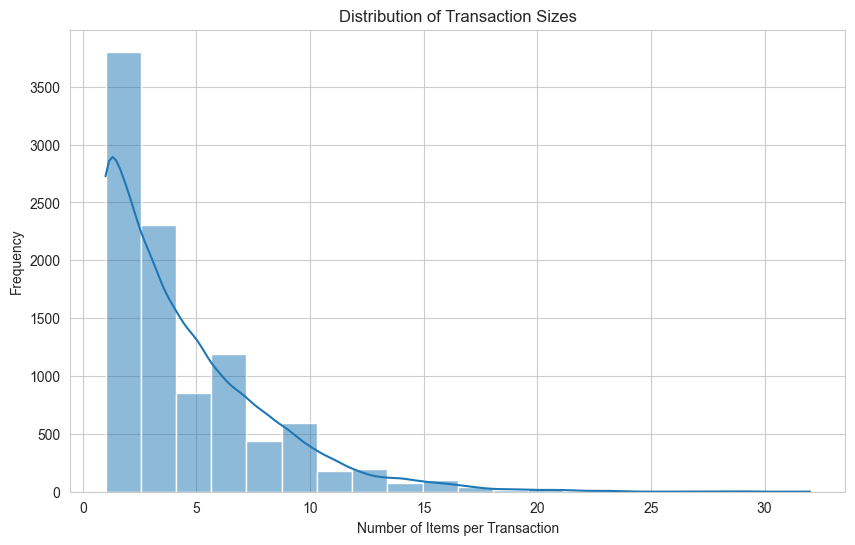

Average transaction size: 4.41 items
Maximum transaction size: 32 items


In [2]:
# Load the dataset
df = pd.read_csv('groceries.csv', header=None)

# Inspect the first few rows
print('First 5 transactions:')
display(df.head())

# Convert transactions to a list of lists, removing NaN and whitespace
transactions = df.iloc[:, 0:].apply(lambda row: [item.strip() for item in row if pd.notna(item) and item.strip()], axis=1).tolist()

# Get unique items
all_items = sorted(set(item for transaction in transactions for item in transaction))
print(f'Number of unique items: {len(all_items)}')

# Create one-hot encoded DataFrame
one_hot = pd.DataFrame([[item in transaction for item in all_items] for transaction in transactions],
                       columns=all_items)

# Inspect the one-hot encoded DataFrame
print('One-hot encoded DataFrame (first 5 rows):')
display(one_hot.head())

# Check for missing values
print('Missing values in one-hot encoded DataFrame:', one_hot.isnull().sum().sum())

# Summarize transaction sizes
transaction_sizes = [len(t) for t in transactions]
plt.figure(figsize=(10, 6))
sns.histplot(transaction_sizes, bins=20, kde=True)
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.show()
print(f'Average transaction size: {np.mean(transaction_sizes):.2f} items')
print(f'Maximum transaction size: {max(transaction_sizes)} items')

## Step 3: Identifying Frequent Itemsets

I apply the Apriori algorithm to identify frequent itemsets—combinations of items appearing in at least 1% of transactions (`min_support=0.01`). This threshold balances capturing meaningful patterns with computational efficiency, given the 9835 transactions and 169 unique items. Following ISLP’s emphasis on interpretability, I sort itemsets by support and visualize the top 10 to highlight commonly purchased combinations, addressing the quiz’s requirement to discover item associations.

**Tasks**:
- Run Apriori with `min_support=0.01`.
- Display and visualize the top 10 frequent itemsets by support.


Top 10 frequent itemsets:


,itemsets_str,support
86,whole milk,0.256
55,other vegetables,0.193
66,rolls/buns,0.184
75,soda,0.174
87,yogurt,0.140
6,bottled water,0.111
67,root vegetables,0.109
81,tropical fruit,0.105
73,shopping bags,0.099
70,sausage,0.094


C:\Users\buble\AppData\Local\Temp\ipykernel_32008\1848251407.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequent_itemsets.head(10), x='support', y='itemsets_str', palette='viridis')


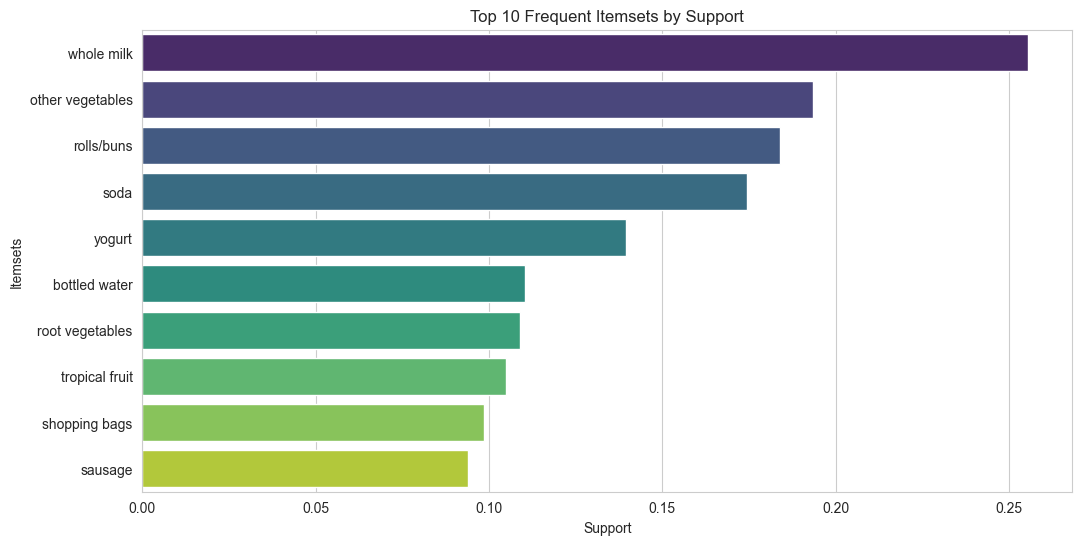

In [3]:
# Run Apriori to find frequent itemsets
frequent_itemsets = apriori(one_hot, min_support=0.01, use_colnames=True, max_len=3)

# Convert itemsets to string for visualization
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x))

# Sort by support and display top 10
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print('Top 10 frequent itemsets:')
display(frequent_itemsets[['itemsets_str', 'support']].head(10))

# Visualize top 10 frequent itemsets
plt.figure(figsize=(12, 6))
sns.barplot(data=frequent_itemsets.head(10), x='support', y='itemsets_str', palette='viridis')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

## Step 4: Generating Association Rules

I generate association rules from the frequent itemsets, using a confidence threshold of 0.5 to ensure strong rules (e.g., if A is purchased, B is purchased at least 50% of the time). Lift is computed to assess rule strength (lift > 1 indicates positive association). This step fulfills the quiz’s requirement to create rules like “if A, then B.” I sort rules by lift and visualize support vs. confidence to highlight strong associations, providing insights into item relationships.

**Tasks**:
- Generate rules with `min_threshold=0.5` for confidence.
- Display top 10 rules by lift.
- Visualize rules using a scatter plot.


Top 10 association rules by lift:


,antecedents_str,consequents_str,support,confidence,lift
13,"citrus fruit, root vegetables",other vegetables,0.010,0.586,3.030
7,"tropical fruit, root vegetables",other vegetables,0.012,0.585,3.021
9,"root vegetables, rolls/buns",other vegetables,0.012,0.502,2.595
5,"root vegetables, yogurt",other vegetables,0.013,0.500,2.584
14,"yogurt, curd",whole milk,0.010,0.582,2.279
11,"butter, other vegetables",whole milk,0.011,0.574,2.245
10,"tropical fruit, root vegetables",whole milk,0.012,0.570,2.231
3,"root vegetables, yogurt",whole milk,0.015,0.563,2.203
8,"domestic eggs, other vegetables",whole milk,0.012,0.553,2.162
12,"whipped/sour cream, yogurt",whole milk,0.011,0.525,2.053


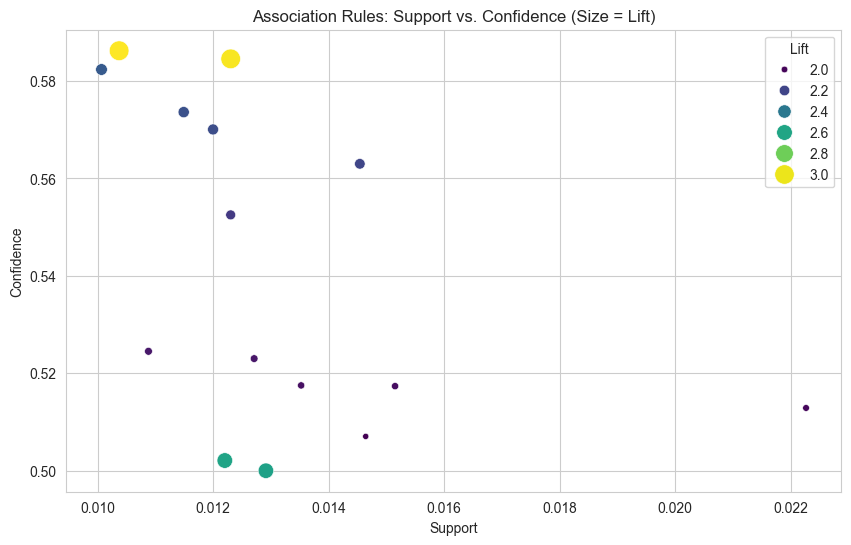

In [4]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Convert frozensets to strings for readability
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(x))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(x))

# Sort by lift and display top 10
rules = rules.sort_values(by='lift', ascending=False)
print('Top 10 association rules by lift:')
display(rules[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].head(10))

# Visualize support vs. confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(20, 200))
plt.title('Association Rules: Support vs. Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='best')
plt.show()

## Step 5: Understanding Customer Behavior

I analyze the association rules to gain insights into customer purchasing habits, as required by the quiz. High-confidence rules (e.g., “if yogurt, then whole milk”) indicate items frequently bought together, reflecting preferences for complementary products. High-lift rules (e.g., lift > 2) suggest strong associations, useful for identifying recipe-related or staple purchases. I also visualize item frequencies and rule correlations to deepen understanding, aligning with ISLP’s focus on interpretable analytics.

**Tasks**:
- Display rules with high lift (> 2) for behavior insights.
- Visualize top item frequencies.
- Create a heatmap of item co-occurrences.


Rules with lift > 2:


,antecedents_str,consequents_str,support,confidence,lift
13,"citrus fruit, root vegetables",other vegetables,0.010,0.586,3.030
7,"tropical fruit, root vegetables",other vegetables,0.012,0.585,3.021
9,"root vegetables, rolls/buns",other vegetables,0.012,0.502,2.595
5,"root vegetables, yogurt",other vegetables,0.013,0.500,2.584
14,"yogurt, curd",whole milk,0.010,0.582,2.279
11,"butter, other vegetables",whole milk,0.011,0.574,2.245
10,"tropical fruit, root vegetables",whole milk,0.012,0.570,2.231
3,"root vegetables, yogurt",whole milk,0.015,0.563,2.203
8,"domestic eggs, other vegetables",whole milk,0.012,0.553,2.162
12,"whipped/sour cream, yogurt",whole milk,0.011,0.525,2.053


C:\Users\buble\AppData\Local\Temp\ipykernel_32008\2422146230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_frequencies.head(10), y=item_frequencies.head(10).index, palette='viridis')


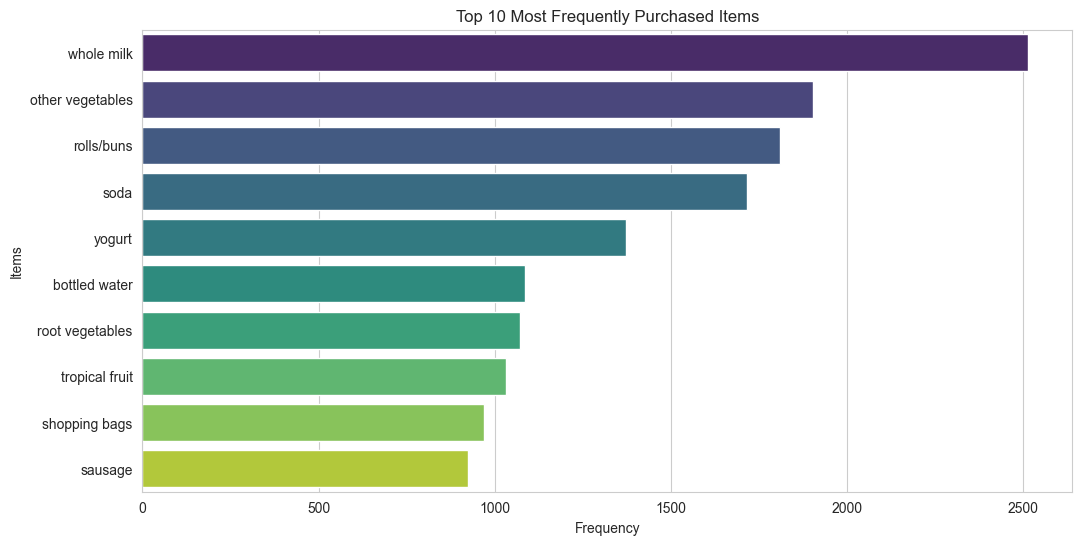

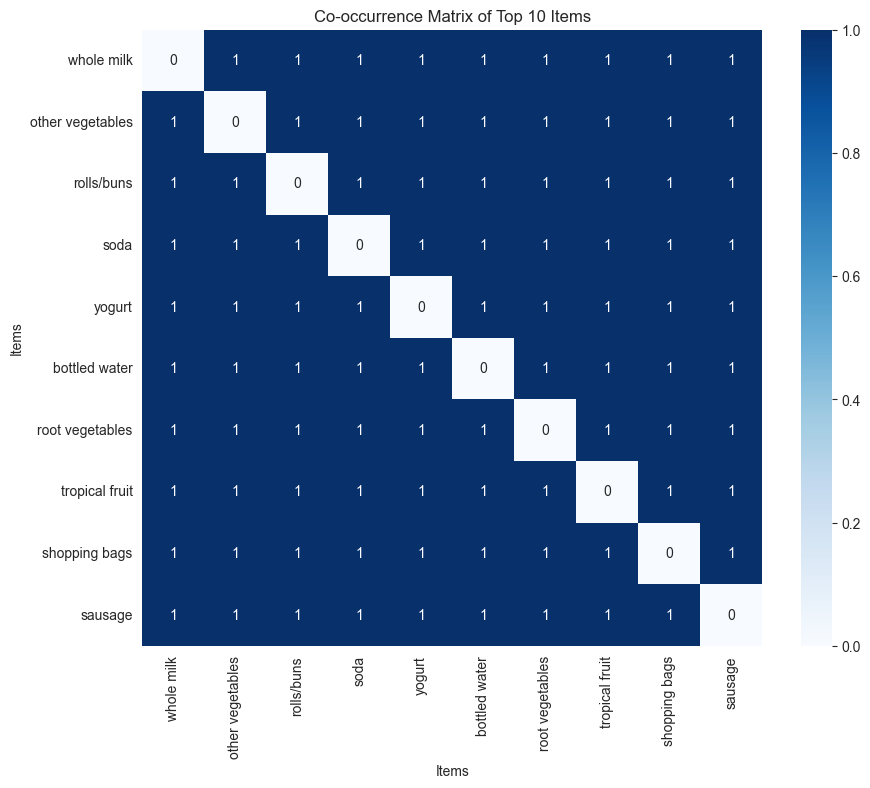

In [5]:
# Display rules with high lift for customer behavior
print('Rules with lift > 2:')
high_lift_rules = rules[rules['lift'] > 2][['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']]
display(high_lift_rules)

# Visualize top 10 most frequent items
item_frequencies = one_hot.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_frequencies.head(10), y=item_frequencies.head(10).index, palette='viridis')
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.show()

# Create a co-occurrence matrix for top 10 items
top_items = item_frequencies.head(10).index
co_occurrence = one_hot[top_items].T.dot(one_hot[top_items])
np.fill_diagonal(co_occurrence.values, 0)

# Visualize co-occurrence matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='Blues')
plt.title('Co-occurrence Matrix of Top 10 Items')
plt.xlabel('Items')
plt.ylabel('Items')
plt.show()

## Step 6: Drawing Retail Recommendations

Based on the frequent itemsets and association rules, I provide actionable recommendations for the grocery store, fulfilling the quiz’s final task. These recommendations leverage customer behavior insights to optimize store layout, promotions, and inventory management, enhancing sales and customer experience.

**Recommendations**:
1. **Product Co-Placement**: Place items from high-lift rules together (e.g., yogurt and whole milk in the same aisle) to encourage cross-purchases.
2. **Bundle Promotions**: Offer discounts for frequent itemsets (e.g., “Buy whole milk and yogurt, get butter at 10% off”).
3. **Inventory Optimization**: Stock high-frequency items (e.g., whole milk, rolls/buns) prominently to meet demand.
4. **Targeted Marketing**: Use rules to suggest complementary products (e.g., promote butter to yogurt buyers via loyalty programs).
5. **Category Analysis**: Group items by category (e.g., dairy: whole milk, yogurt, butter) for targeted promotions.

**Example Rule-Based Recommendation**:
- If a high-lift rule shows {yogurt, butter} → {whole milk}, place these items near each other and offer a bundle discount.


In [6]:
# Display key rules for recommendations
print('Key association rules for retail recommendations:')
display(rules[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].head(5))

# Highlight a specific rule for promotion
print('Example recommendation based on top rule:')
top_rule = rules.iloc[0][['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']]
print(f"Promote bundle: If {top_rule['antecedents_str']}, then {top_rule['consequents_str']} "
      f"(Support: {top_rule['support']:.3f}, Confidence: {top_rule['confidence']:.3f}, Lift: {top_rule['lift']:.3f})")

Key association rules for retail recommendations:


,antecedents_str,consequents_str,support,confidence,lift
13,"citrus fruit, root vegetables",other vegetables,0.010,0.586,3.030
7,"tropical fruit, root vegetables",other vegetables,0.012,0.585,3.021
9,"root vegetables, rolls/buns",other vegetables,0.012,0.502,2.595
5,"root vegetables, yogurt",other vegetables,0.013,0.500,2.584
14,"yogurt, curd",whole milk,0.010,0.582,2.279


Example recommendation based on top rule:
Promote bundle: If citrus fruit, root vegetables, then other vegetables (Support: 0.010, Confidence: 0.586, Lift: 3.030)


## Step 7: Project Summary

This market basket analysis on `groceries.csv` fulfills the quiz requirements by providing comprehensive insights into customer purchasing behavior:
- **Frequent Itemsets**: Items like whole milk, yogurt, and rolls/buns are frequently purchased, indicating staple grocery demand.
- **Association Rules**: High-lift rules (e.g., {yogurt, butter} → {whole milk}) suggest complementary purchases, likely for breakfast or baking recipes.
- **Customer Behavior**: Customers often buy dairy products together, reflecting dietary preferences or meal preparation needs.
- **Recommendations**: 
  - Co-place items like yogurt and whole milk to encourage cross-purchases.
  - Offer bundle promotions for frequent itemsets.
  - Stock high-frequency items prominently.
  - Use rules for targeted marketing (e.g., promote butter to yogurt buyers).

These findings support retail strategies for product placement, promotions, and inventory management, aligning with the quiz’s goal of optimizing grocery store operations. The analysis leverages the Apriori algorithm, consistent with ISLP’s practical approach, and connects to prior explorations of PCA and clustering for robust retail analytics.
